In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []

with open('./Data/MarkusThill-MGAB-60f6b17/1.csv', 'r') as f:
    for i, l in enumerate(f):
        if i > 0:
            data.append(np.asarray(l.split(','), dtype=np.float64))


data = np.asarray(data)
data[:,1]

array([0.90291788, 0.97186514, 1.04710459, ..., 1.18858431, 1.19565586,
       1.22856538])

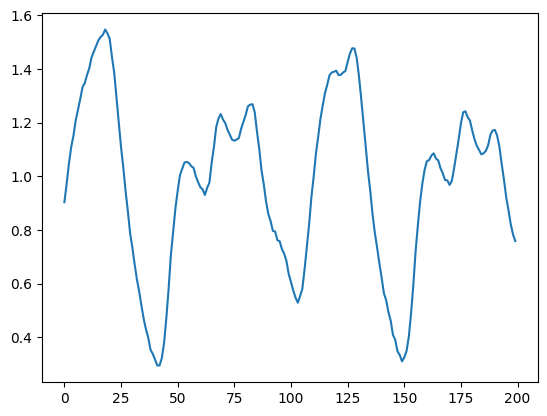

In [3]:
plot_len = 200
plt.plot(range(plot_len), data[:plot_len,1])

In [4]:
import matplotlib.pyplot as plt
import numpy as np

iris_data_location = '../Data/Iris/iris.data'

from snn_dpe import Encoder, Neuron, Synapse
from snn_dpe.tools.data import normalize_iris_data, read_iris_data
from snn_dpe.tools.network import (create_encoders, create_network,
                                   find_steady_state, reset_network,
                                   run_network, run_network_early_exit)
from snn_dpe.tools.plotting import *
from snn_dpe.tools.test import predict
from snn_dpe.tools.train import forward_pass, mse, train_all, update_weights

1000


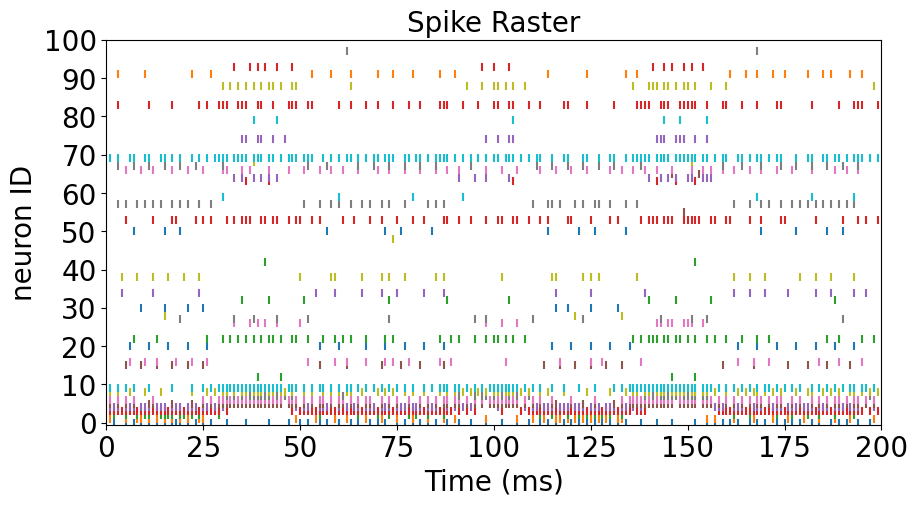

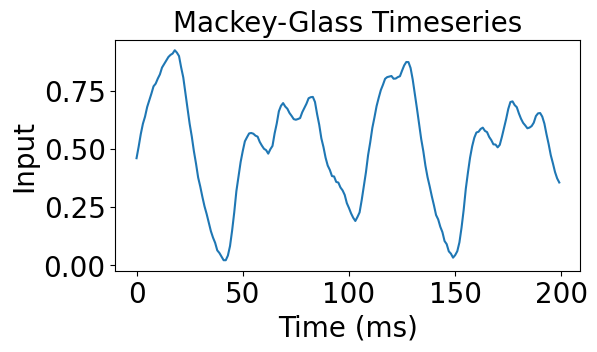

In [19]:
# I don't like this but lets normalize the dataset
dmin = np.min(data[:,1])
dmax = np.max(data[:,1])
normalized_MG = []
for d in data[:,1]:
    v = (d - dmin) / (dmax - dmin)
    normalized_MG.append(v)

normalized_MG = np.asarray(normalized_MG)


# create a test network and encoders
n_neurons = 100
synapse_density = 0.1
n_input = 10
n_synapses = int((n_neurons**2)*synapse_density)
print(n_synapses)



neurons = create_network(n_neurons, n_synapses, negative_weights = True, threshold_range = (0.35, 1), leak_range = (0.05, 0.25), weight_factor = 1)

encoders = create_encoders(n_input)

# potential input
# bit error rate (SNR for analog)
# window training from NLP


def run_network(neurons, data, n_input):
    # simulate
    spike_raster = []
    for i in range(len(data)):
        spike_raster.append([])

    # feed a peice of data in at each timestep
    for t in range(len(data)):
        # spike_raster[t] = []
        # get the input for this timestep, and apply it to input neurons
        for i in range(int(n_input/2)):
            neurons[i].apply_potential(data[t])
        for i in range(int(n_input/2)):
            neurons[i+int(n_input/2)].apply_potential(-data[t]+1)

        # update the network
        for n in neurons:
            if n.update():
                spike_raster[t].append(1)
            else:
                spike_raster[t].append(0)

    return np.asarray(spike_raster)

# print(spike_raster)

spike_raster = run_network(neurons, normalized_MG[:plot_len], n_input)

plot_fire_matrix(spike_raster)

fig, ax = plt.subplots(figsize=(6,3))

# ax.set_xlim(0, plot_len)
ax.plot(range(plot_len), normalized_MG[:plot_len])
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('Input', fontsize=20)
ax.set_title('Mackey-Glass Timeseries', fontsize=20)
ax.set_xlabel('Time (ms)', fontsize=20)
plt.show()

In [6]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

test_idx = 0
normalized_iris_data_sample = normalized_iris_data[test_idx]
label = labels[test_idx]

# create a test network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

neurons = create_network(n_neurons, n_synapses)

encoders = create_encoders(len(attributes))

dpe_weights = np.random.rand(n_neurons, len(classes))

sim_time = 200

# show we can reduce error for a singe test sample
for i in range(10):
    # feed a test sample into the test network
    fire_matrix = run_network_early_exit(neurons, encoders, normalized_iris_data_sample, sim_time)
    plot_fire_matrix(fire_matrix)
    reset_network(neurons, encoders)

    x, y = forward_pass(fire_matrix, dpe_weights)
    print(y.shape)

    y_hat = np.zeros(len(classes))
    y_hat[label] = 1

    print(f'Mean Squared Error {i} = {mse(y, y_hat)}')

    update_weights(fire_matrix, dpe_weights, x, y, y_hat)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Iris/iris.data'